# Machine Learning Project - The Bank Marketing Campaign

I7isai



**Dataset:** https://www.kaggle.com/tmdb/tmdb-movie-metadata


Use regression techniques to predict a movie's rating based on different characteristics.


**Notes**
    
    1. Use the "vote_average" column as a target.
    2. Use regression techniques to predict the rating (vote_average) that a movie will have based on different characteristics.
    
**Recommendations**
    
    1. It is not necessary, nor recommended, to use all available features (especially the non-numeric ones).
    2. The exercise may take a long or short time, depending on the exploration being done. It is not expected to explore all the details, nor all possible approaches.
    3. If there is a lack of time to explore everything you would like, or if you want to do a technique that would take a long time, explain by writing what the idea was and what you would hope to achieve.
    4. Try to explain as much as possible the reasoning behind every step you take.
    5. Above all, have fun!
    
**Questions**

    1. How many movies are in the dataset? And how many features?
    2. Are there variables that are not independent of each other?
    3. Which regression technique led to the best results?
    4. What factors contribute most to the success of a film?
    5. Would you recommend your model to a film production company?
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler


seed = 42

In [2]:
def adjusted_r2(r2, X):

  return ( 1 - ((1 - r2)*(X.shape[0] -1)/(X.shape[0] - X.shape[1] - 1)))

In [3]:
def potential_outliers(x, n_std):
    mean = x.mean()
    std = x.std()

    upper_bound = mean + n_std * std
    lower_bound = mean - n_std * std

    n_outliers = sum(x < lower_bound) + sum(x > upper_bound)
    
    print(f"Outliers beyond {n_std}std of mean:", n_outliers)
    print(f"lower_bound={lower_bound:2.1f}; upper_bound={upper_bound:2.1f}")
    return n_outliers

In [4]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
df.shape

(4803, 20)

In [7]:
df['original_title'].value_counts() # There are repeated entries in the list

Out of the Blue       2
Batman                2
Undiscovered          1
Beneath Hill 60       1
The I Inside          1
                     ..
Secondhand Lions      1
The Age of Adaline    1
Drag Me to Hell       1
Southpaw              1
My Date with Drew     1
Name: original_title, Length: 4801, dtype: int64

In [8]:
df_movies = df.select_dtypes(include = 'number')

In [9]:
df_movies = df_movies.drop('id', 1)

C:\Users\JLCoito\AppData\Local\Temp/ipykernel_9568/3567804540.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_movies = df_movies.drop('id', 1)


In [10]:
df_movies.head(2)

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500


In [11]:
# Eliminate null values

df_movies.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

In [12]:
df_movies.dropna(inplace=True)

In [13]:
# Confirm drop of NaNs

df_movies.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

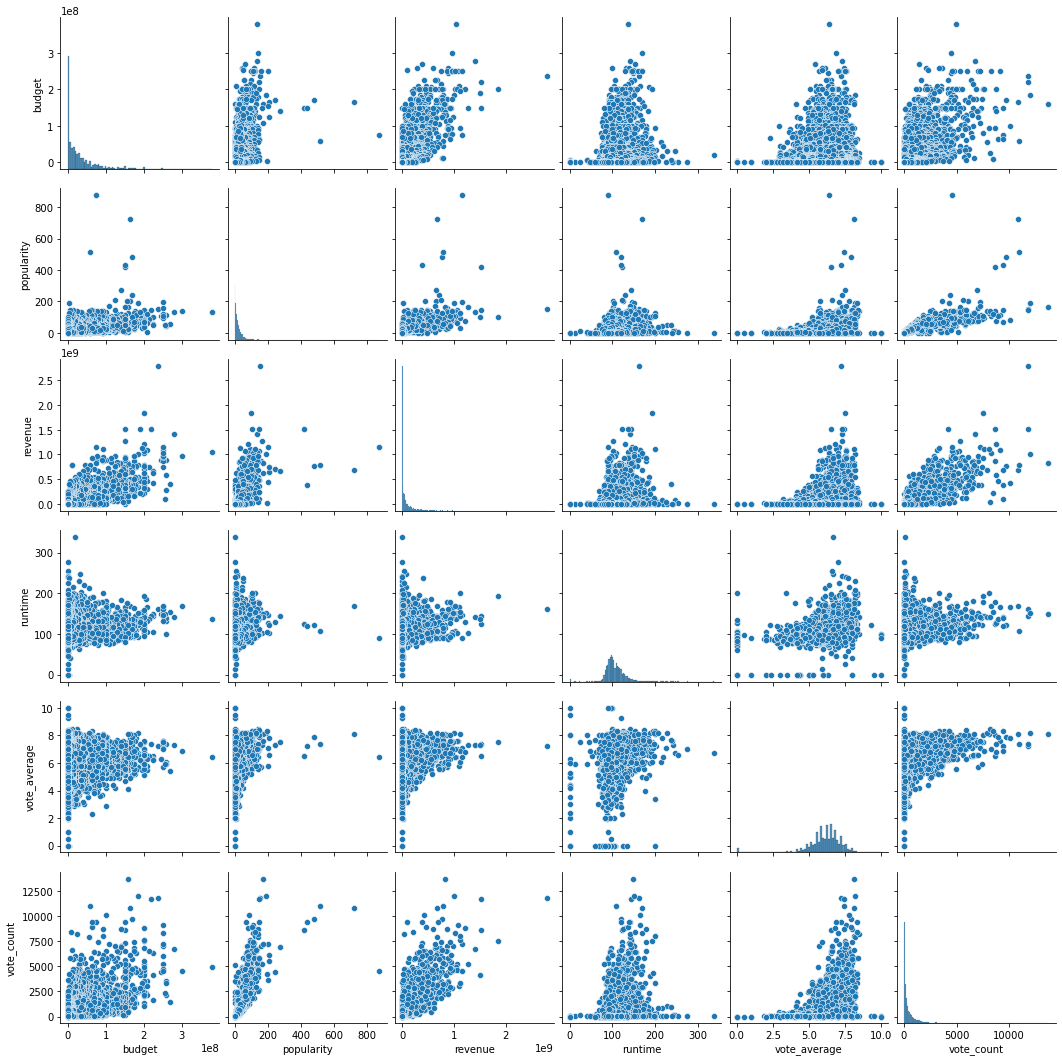

In [14]:
sns.pairplot(df_movies)

# BASELINE - simple linear regression with the most correlated feature with target - 'vote_average'

<AxesSubplot:>

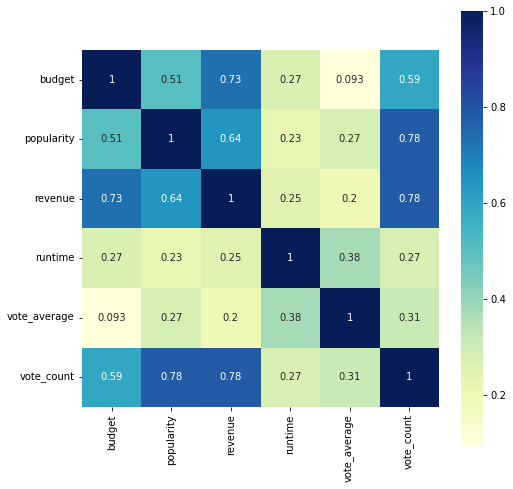

In [15]:
fig = plt.figure(figsize = (8, 8))

sns.heatmap(df_movies.corr().abs(),square=True, annot = True, cmap = 'YlGnBu')

In [16]:
# The most correlated feature: 'runtime 

In [17]:
train_set, test_set = train_test_split(df_movies, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average'], axis = 1)
y_train = train_set['vote_average']

X_test = test_set.drop(['vote_average'], axis = 1)
y_test = test_set['vote_average']

In [18]:
X_train_slr = X_train[['runtime']]

X_test_slr = X_test[['runtime']]

In [19]:
lr = LinearRegression().fit(X_train_slr, y_train)

In [20]:
lr.coef_

array([0.01868729])

In [21]:
lr.intercept_

4.1018991004564125

In [22]:
y_preds = lr.predict(X_test_slr)

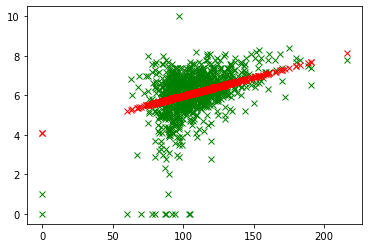

In [23]:
plt.plot(X_test_slr, y_test, 'gx')
plt.plot(X_test_slr, y_preds, 'rx')

In [24]:
r2_score(y_test, y_preds) # R2

0.16961710418348241

In [25]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.0810611416868479

In [26]:
mean_absolute_error(y_test, y_preds) # MAE

0.7402806451400581

In [27]:
residuals = y_preds - y_test # residuals 

In [28]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1123.11


In [29]:
# We now have our baseline 

# Multiple linear regression with the TWO most correlated features with target. 'runtime' and 'vote_count'

All other features seem to be correlated between themselves


In [30]:
X_train_mlr_2v = X_train[['runtime', 'vote_count']]
X_test_mlr_2v = X_test[['runtime', 'vote_count']]

In [31]:
lr = LinearRegression().fit(X_train_mlr_2v, y_train)

In [32]:
lr.coef_

array([0.0156466 , 0.00023601])

In [33]:
lr.intercept_

4.268066358289728

In [34]:
y_preds = lr.predict(X_test_mlr_2v)

In [35]:
r2_mlr_2v = r2_score(y_test, y_preds) # R2

In [36]:
adjusted_r2(r2_mlr_2v, X_train_mlr_2v) # Adjusted R2

0.20674950659905222

In [37]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.0563384268112328

In [38]:
mean_absolute_error(y_test, y_preds) # MAE

0.7239036504771104

In [39]:
residuals = y_preds - y_test # residuals 

In [40]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1072.33


In [41]:
# we improve the results but only slightly

# Multiple linear regression with ALL variables. This approach have some problems, mainly collinearity between many of the features

In [42]:
lr = LinearRegression().fit(X_train, y_train)

In [43]:
lr.coef_

array([-5.71020256e-09,  3.05209357e-03, -3.48445495e-10,  1.69335356e-02,
        3.18402385e-04])

In [44]:
lr.intercept_

4.200346986528862

In [45]:
y_preds = lr.predict(X_test)

In [46]:
r2_score(y_test, y_preds)

0.23148050797857456

In [47]:
r2_mlr_all = r2_score(y_test, y_preds) # R2

In [48]:
adjusted_r2(r2_mlr_all, X_train) # Adjusted R2

0.23047826555288153

In [49]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.04001236573472

In [50]:
mean_absolute_error(y_test, y_preds) # MAE

0.6866686352643436

In [51]:
residuals = y_preds - y_test # residuals 

In [52]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1039.44


* Based on the following observations it is difficult to recommend the model to a film producer. Until now, the RMSE has always been greater than 1 when in a good model it should be as close as possible to 0.
* MAE should be close to 0 and yet in the best estimates it is at 0.69, which means that the model is wrong in 69% of the predictions. RSS should be as low as possible. And despite decreasing with the iterations, it remains quite high.

In [53]:
# we keep improving the metrics but the model is still not good enough to recommend it

# Simple non-linear regression with 2º polynomial using the 'runtime' feature

In [54]:
poly = PolynomialFeatures(2)

In [55]:
X_train_slr_transformed = poly.fit_transform(X_train_slr)
X_test_slr_transformed = poly.fit_transform(X_test_slr)

In [56]:
X_train_slr_transformed = pd.DataFrame(X_train_slr_transformed, columns = poly.get_feature_names(X_train_slr.columns))
X_test_slr_transformed = pd.DataFrame(X_test_slr_transformed, columns = poly.get_feature_names(X_test_slr.columns))

In [57]:
X_train_slr_transformed

,1,runtime,runtime^2
0,1.0,94.0,8836.0
1,1.0,92.0,8464.0
2,1.0,91.0,8281.0
3,1.0,104.0,10816.0
4,1.0,119.0,14161.0
...,...,...,...
3835,1.0,87.0,7569.0
3836,1.0,96.0,9216.0
3837,1.0,104.0,10816.0
3838,1.0,96.0,9216.0


In [58]:
non_lr = LinearRegression().fit(X_train_slr_transformed, y_train)

In [59]:
non_lr.coef_

array([ 0.00000000e+00,  3.48286413e-02, -7.01567402e-05])

In [60]:
y_preds = non_lr.predict(X_test_slr_transformed)

In [61]:
r2_score(y_test, y_preds) # R2

0.17975789765686845

In [62]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.0744398024394028

In [63]:
mean_absolute_error(y_test, y_preds) # MAE

0.7385143677874617

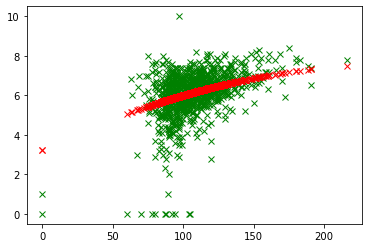

In [64]:
plt.plot(X_test_slr, y_test, 'gx')
plt.plot(X_test_slr, y_preds, 'rx')

In [65]:
residuals = y_preds - y_test # residuals 

In [66]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1109.40


In [67]:
# Again the metrics show this is not a good model

# Multiple non-linear regression with 2º polynomial with features 'runtime' and 'vote_count'

In [68]:
X_train_2v_transformed = poly.fit_transform(X_train_mlr_2v)
X_test_2v_transformed = poly.fit_transform(X_test_mlr_2v)

In [69]:
X_train_2v_transformed = pd.DataFrame(X_train_2v_transformed, columns = poly.get_feature_names(X_train_mlr_2v.columns))
X_test_2v_transformed = pd.DataFrame(X_test_2v_transformed, columns = poly.get_feature_names(X_test_mlr_2v.columns))

In [70]:
X_train_2v_transformed

,1,runtime,vote_count,runtime^2,runtime vote_count,vote_count^2
0,1.0,94.0,364.0,8836.0,34216.0,132496.0
1,1.0,92.0,2210.0,8464.0,203320.0,4884100.0
2,1.0,91.0,1708.0,8281.0,155428.0,2917264.0
3,1.0,104.0,127.0,10816.0,13208.0,16129.0
4,1.0,119.0,257.0,14161.0,30583.0,66049.0
...,...,...,...,...,...,...
3835,1.0,87.0,92.0,7569.0,8004.0,8464.0
3836,1.0,96.0,631.0,9216.0,60576.0,398161.0
3837,1.0,104.0,37.0,10816.0,3848.0,1369.0
3838,1.0,96.0,67.0,9216.0,6432.0,4489.0


In [71]:
non_lr = LinearRegression().fit(X_train_2v_transformed, y_train)

In [72]:
non_lr.coef_

array([ 0.00000000e+00,  2.88777990e-02,  6.94313609e-04, -5.35985463e-05,
       -2.21757894e-06, -3.21403740e-08])

In [73]:
y_preds = non_lr.predict(X_test_2v_transformed)

In [74]:
r2_score(y_test, y_preds) # R2

0.23641223521194243

In [75]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.036670022184142

In [76]:
mean_absolute_error(y_test, y_preds) # MAE

0.7148671361122456

In [77]:
residuals = y_preds - y_test # residual 

In [78]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1032.77


In [79]:
# Although the metrics are still bad, so far this seems to be the best model

# Multiple non-linear regression with 2º polynomial with ALL features - again we might have a collinearity problem with this approach

In [80]:
X_train_all_v = poly.fit_transform(X_train)
X_test_all_v = poly.fit_transform(X_test)

In [81]:
X_train_all_v = pd.DataFrame(X_train_all_v, columns = poly.get_feature_names(X_train.columns))
X_test_all_v = pd.DataFrame(X_test_all_v, columns = poly.get_feature_names(X_test.columns))

In [82]:
X_train_all_v

,1,budget,popularity,revenue,runtime,vote_count,budget^2,budget popularity,budget revenue,budget runtime,...,popularity^2,popularity revenue,popularity runtime,popularity vote_count,revenue^2,revenue runtime,revenue vote_count,runtime^2,runtime vote_count,vote_count^2
0,1.0,12000000.0,16.183746,22939027.0,94.0,364.0,1.440000e+14,1.942050e+08,2.752683e+14,1.128000e+09,...,261.913635,3.712394e+08,1521.272124,5890.883544,5.261990e+14,2.156269e+09,8.349806e+09,8836.0,34216.0,132496.0
1,1.0,8000000.0,45.395839,74952305.0,92.0,2210.0,6.400000e+13,3.631667e+08,5.996184e+14,7.360000e+08,...,2060.782199,3.402523e+09,4176.417188,100324.804190,5.617848e+15,6.895612e+09,1.656446e+11,8464.0,203320.0,4884100.0
2,1.0,400000.0,64.782984,5028948.0,91.0,1708.0,1.600000e+11,2.591319e+07,2.011579e+12,3.640000e+07,...,4196.835016,3.257903e+08,5895.251544,110649.336672,2.529032e+13,4.576343e+08,8.589443e+09,8281.0,155428.0,2917264.0
3,1.0,25000000.0,8.316530,6673422.0,104.0,127.0,6.250000e+14,2.079132e+08,1.668356e+14,2.600000e+09,...,69.164671,5.549971e+07,864.919120,1056.199310,4.453456e+13,6.940359e+08,8.475246e+08,10816.0,13208.0,16129.0
4,1.0,14000000.0,14.480628,34670720.0,119.0,257.0,1.960000e+14,2.027288e+08,4.853901e+14,1.666000e+09,...,209.688587,5.020538e+08,1723.194732,3721.521396,1.202059e+15,4.125816e+09,8.910375e+09,14161.0,30583.0,66049.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,1.0,950000.0,7.310879,0.0,87.0,92.0,9.025000e+11,6.945335e+06,0.000000e+00,8.265000e+07,...,53.448952,0.000000e+00,636.046473,672.600868,0.000000e+00,0.000000e+00,0.000000e+00,7569.0,8004.0,8464.0
3836,1.0,80000000.0,25.978555,123729176.0,96.0,631.0,6.400000e+15,2.078284e+09,9.898334e+15,7.680000e+09,...,674.885320,3.214305e+09,2493.941280,16392.468205,1.530891e+16,1.187800e+10,7.807311e+10,9216.0,60576.0,398161.0
3837,1.0,0.0,8.045488,0.0,104.0,37.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,64.729877,0.000000e+00,836.730752,297.683056,0.000000e+00,0.000000e+00,0.000000e+00,10816.0,3848.0,1369.0
3838,1.0,0.0,4.757625,1919197.0,96.0,67.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,22.634996,9.130820e+06,456.732000,318.760875,3.683317e+12,1.842429e+08,1.285862e+08,9216.0,6432.0,4489.0


In [83]:
non_lr = LinearRegression().fit(X_train_all_v, y_train)

In [84]:
non_lr.coef_

array([ 0.00000000e+00, -4.95496572e-09,  1.71111031e-05,  4.76078768e-11,
        1.67499539e-06,  8.45871525e-04,  4.85910004e-18, -5.59710575e-11,
        1.02476856e-17, -2.02218511e-11, -2.96394583e-13,  3.54681059e-06,
       -8.71847955e-12,  1.53210875e-04, -8.49907119e-07, -6.49277224e-19,
       -6.32979802e-12,  2.81255463e-13,  5.86929005e-05, -4.00719587e-06,
       -2.86040355e-08])

In [85]:
y_preds = non_lr.predict(X_test_all_v)

In [86]:
r2_score(y_test, y_preds) # R2

0.25514573591584255

In [87]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.0238744690704564

In [88]:
mean_absolute_error(y_test, y_preds) # MAE

0.6785666918645391

In [89]:
residuals = y_preds - y_test # residuals 

In [90]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1007.43


In [91]:
# Although not being good, the metrics improved substancial. Again, however we have a collinearity problem

# Remove outliers from 'runtime'

    

In [92]:
df_2 = df.select_dtypes(include='number') # let's read the dataset again

In [93]:
df_2.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

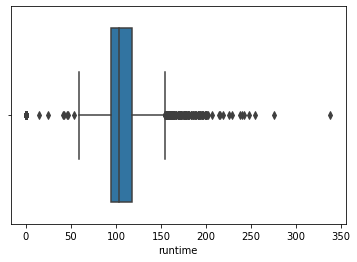

In [94]:
sns.boxplot(df_2.runtime)

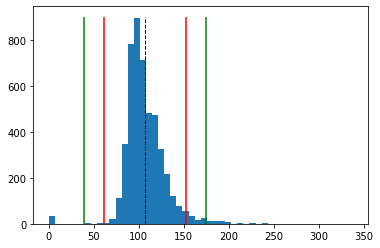

In [95]:
runtime_mean = df_2['runtime'].mean()
runtime_std = df_2['runtime'].std()

plt.hist(df_2['runtime'], bins=50)
plt.vlines(runtime_mean, 0, 900, color="k", linestyle="--", lw=1, label="mean")
plt.vlines([runtime_mean - 2 * runtime_std, runtime_mean + 2 * runtime_std], 0, 900,
           color="r", label="$\mu$ ±2 $\sigma$")
plt.vlines([runtime_mean - 3 * runtime_std, runtime_mean + 3 * runtime_std], 0, 900,
           color="g", label="$\mu$ ±3 $\sigma$")

plt.show()

In [96]:
print('### runetime ###')
potential_outliers(df_2['runtime'], 2)
print()
potential_outliers(df_2['runtime'], 3)
print()

### runetime ###
Outliers beyond 2std of mean: 203
lower_bound=61.7; upper_bound=152.1

Outliers beyond 3std of mean: 97
lower_bound=39.0; upper_bound=174.7



In [97]:
mask_runtime = (
    (df_2['runtime'] < runtime_mean - 3 * runtime_std)
    | (df_2['runtime'] > runtime_mean + 3 * runtime_std)
)

In [98]:
df_2[mask_runtime]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
24,207000000,254,61.226010,550000000,187.0,6.6,2337
25,200000000,597,100.025899,1845034188,194.0,7.5,7562
110,140000000,676,34.206690,449220945,183.0,6.6,1791
112,155000000,1966,39.019229,167298192,175.0,5.6,927
262,93000000,120,138.049577,871368364,178.0,8.0,8705
...,...,...,...,...,...,...,...
4657,0,320435,0.010607,0,0.0,0.0,0
4658,0,150211,1.084387,0,0.0,4.2,14
4662,0,40963,0.092100,0,0.0,10.0,1
4709,0,13187,8.701183,0,25.0,7.5,153


In [99]:
df_2_t = df_2[~mask_runtime].copy()

In [100]:
df_2_t.runtime.describe()

count    4704.000000
mean      106.535502
std        17.756091
min        41.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       174.000000
Name: runtime, dtype: float64

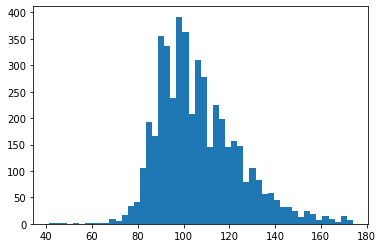

In [101]:
# Confirm the new destribution

plt.hist(df_2_t['runtime'], bins=50)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

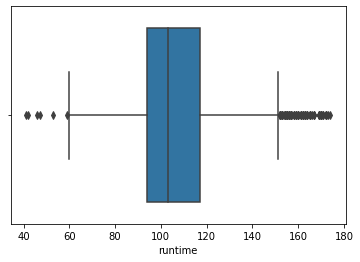

In [102]:
sns.boxplot(df_2_t['runtime'])

In [103]:
df_2_t.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         2
vote_average    0
vote_count      0
dtype: int64

<AxesSubplot:>

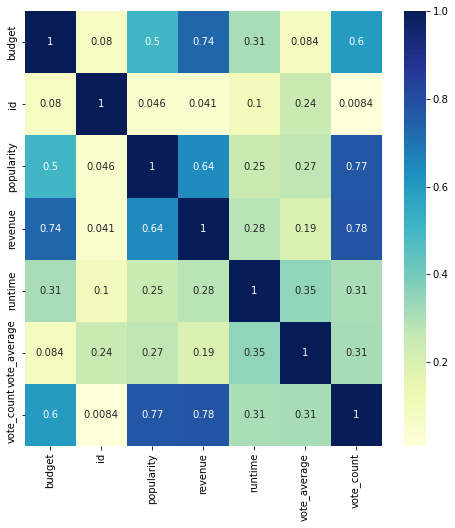

In [104]:
fig = plt.figure(figsize = (8, 8))

sns.heatmap(df_2_t.corr().abs(), annot = True, cmap = 'YlGnBu')

# Simples linear regression with the 'runtime' feature without outliers

In [105]:
train_set, test_set = train_test_split(df_2_t, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average'], axis = 1)
y_train = train_set['vote_average']

X_test = test_set.drop(['vote_average'], axis = 1)
y_test = test_set['vote_average']

In [106]:
X_test.isnull().sum()

budget        0
id            0
popularity    0
revenue       0
runtime       2
vote_count    0
dtype: int64

In [107]:
X_test = X_test.fillna(X_test.median()) # replacing null values was made after train and test separation in order to avoid bias when forming these two datasets

In [108]:
X_train_slr1 = X_train[['runtime']]

X_test_slr1 = X_test[['runtime']]

In [109]:
lr = LinearRegression().fit(X_train_slr1, y_train)

In [110]:
lr.coef_

array([0.02207492])

In [111]:
lr.intercept_

3.7468986837606013

In [112]:
y_preds = lr.predict(X_test_slr1)

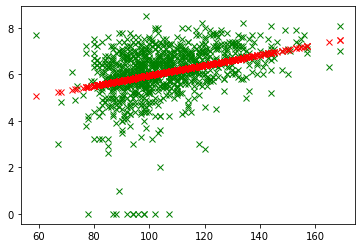

In [113]:
plt.plot(X_test_slr1, y_test, 'gx')
plt.plot(X_test_slr1, y_preds, 'rx')

In [114]:
r2_score(y_test, y_preds) # R2

0.1222226780006288

In [115]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

1.0907434956592632

In [116]:
mean_absolute_error(y_test, y_preds) # MAE

0.7483302504417052

In [117]:
residuals = y_preds - y_test # residuals 

In [118]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 1120.72


In [119]:
# Removing outliers from 'runtime' didn't help the correlation between this feature and target feature
# The results was visible in the linear regression metrics
# We will not persue further models with this conditions


# Removing outliers from both 'runtime' and target feature

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average'>

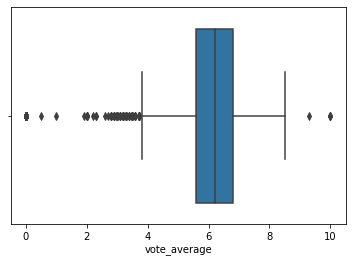

In [120]:
sns.boxplot(df_2_t['vote_average']) # dataset already WITHOUT 'runtime' OUTLIERS

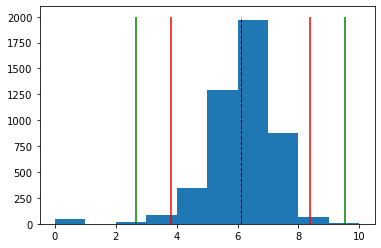

In [121]:
va_mean = df_2_t['vote_average'].mean()
va_std = df_2_t['vote_average'].std()

plt.hist(df_2_t['vote_average'], bins=10)
plt.vlines(va_mean, 0, 2000, color="k", linestyle="--", lw=1, label="mean")
plt.vlines([va_mean - 2 * va_std, va_mean + 2 * va_std], 0, 2000,
           color="r", label="$\mu$ ±2 $\sigma$")
plt.vlines([va_mean - 3 * va_std, va_mean + 3 * va_std], 0, 2000,
           color="g", label="$\mu$ ±3 $\sigma$")

plt.show()

In [122]:
print('### vote_average ###')
potential_outliers(df_2_t['vote_average'], 2)
print()
potential_outliers(df_2_t['vote_average'], 3)
print()

### vote_average ###
Outliers beyond 2std of mean: 148
lower_bound=3.8; upper_bound=8.4

Outliers beyond 3std of mean: 65
lower_bound=2.7; upper_bound=9.5



In [123]:
mask_target = (
    (df_2_t['vote_average'] < va_mean - 3 * va_std)
    | (df_2_t['vote_average'] > va_mean + 3 * va_std)
)

In [124]:
df_2_t[mask_target]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
1101,65000000,116977,5.258726,73706,87.0,2.3,28
1464,0,310706,0.126738,0,100.0,0.0,0
2220,0,31117,5.886228,9109322,88.0,1.9,35
2256,0,112937,0.285760,0,88.0,2.2,8
2272,0,239897,0.485405,0,98.0,0.5,1
...,...,...,...,...,...,...,...
4771,0,220490,0.056459,0,89.0,0.0,0
4780,0,366967,0.038143,0,90.0,0.0,0
4785,0,287625,0.327794,0,60.0,0.0,0
4791,13,157185,0.332679,0,84.0,2.0,1


In [125]:
df_2_t = df_2_t[~mask_target].copy()

In [126]:
df_2_t.shape

(4641, 7)

<AxesSubplot:>

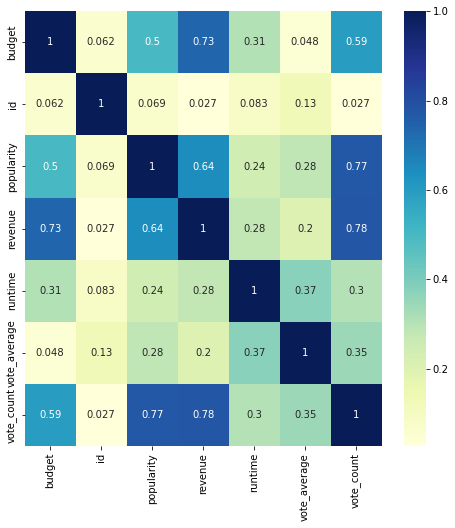

In [127]:
fig = plt.figure(figsize = (8, 8))

sns.heatmap(df_2_t.corr().abs(), annot = True, cmap = 'YlGnBu')

In [128]:
# Removing outliers from 'runtime' and target feature did not improve the correlation between these two features.
# We will not persue additional models with these conditions

# Removing moveis with 0 'budget', 'reveneu' and 'runtime'. Additionally remove outliers from 'runtime' and target feature


In [129]:
df_2.shape

(4803, 7)

In [130]:
mask = (
    (df_2['budget'] == 0)
    | (df_2['revenue'] == 0)
       | (df_2['runtime'] == 0)
)

In [131]:
df_2[mask]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
83,27000000,79698,2.418535,0,109.0,4.8,34
135,150000000,7978,21.214571,0,102.0,5.5,549
265,0,10588,18.251129,0,82.0,4.9,366
309,84000000,10214,17.815595,0,94.0,3.6,338
321,0,77953,16.460356,104907746,85.0,5.6,578
...,...,...,...,...,...,...,...
4797,0,67238,0.022173,0,80.0,7.5,2
4799,9000,72766,0.642552,0,85.0,5.9,5
4800,0,231617,1.444476,0,120.0,7.0,6
4801,0,126186,0.857008,0,98.0,5.7,7


In [132]:
df_2_movies = df_2[~mask]

In [133]:
df_2_movies.shape

(3229, 7)

<AxesSubplot:>

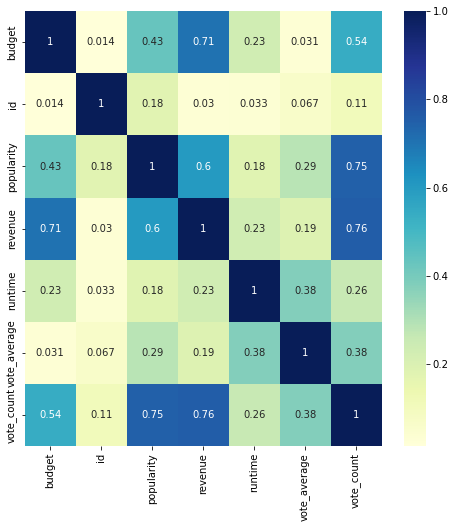

In [134]:
fig = plt.figure(figsize = (8, 8))

sns.heatmap(df_2_movies.corr().abs(), annot = True, cmap = 'YlGnBu')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

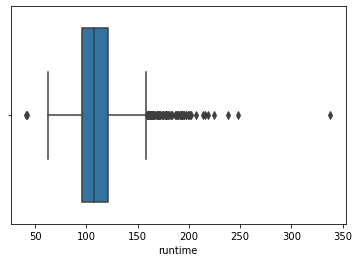

In [135]:
sns.boxplot(df_2_movies['runtime'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average'>

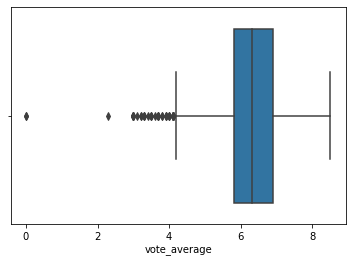

In [136]:
sns.boxplot(df_2_movies['vote_average'])

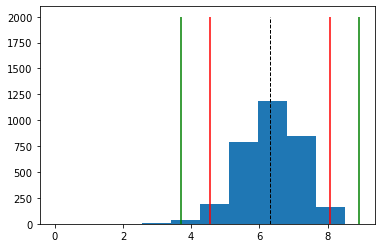

In [137]:
va_mean = df_2_movies['vote_average'].mean()
va_std = df_2_movies['vote_average'].std()

plt.hist(df_2_movies['vote_average'], bins=10)
plt.vlines(va_mean, 0, 2000, color="k", linestyle="--", lw=1, label="mean")
plt.vlines([va_mean - 2 * va_std, va_mean + 2 * va_std], 0, 2000,
           color="r", label="$\mu$ ±2 $\sigma$")
plt.vlines([va_mean - 3 * va_std, va_mean + 3 * va_std], 0, 2000,
           color="g", label="$\mu$ ±3 $\sigma$")

plt.show()

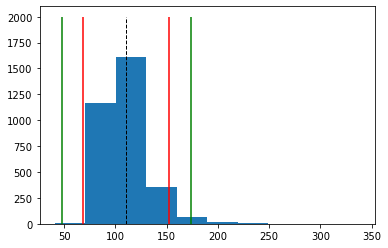

In [138]:
ru_mean = df_2_movies['runtime'].mean()
ru_std = df_2_movies['runtime'].std()

plt.hist(df_2_movies['runtime'], bins=10)
plt.vlines(ru_mean, 0, 2000, color="k", linestyle="--", lw=1, label="mean")
plt.vlines([ru_mean - 2 * ru_std, ru_mean + 2 * ru_std], 0, 2000,
           color="r", label="$\mu$ ±2 $\sigma$")
plt.vlines([ru_mean - 3 * ru_std, ru_mean + 3 * ru_std], 0, 2000,
           color="g", label="$\mu$ ±3 $\sigma$")

plt.show()

In [139]:
print('### runtime ###')
potential_outliers(df_2_movies['runtime'], 2)
print()
potential_outliers(df_2_movies['runtime'], 3)
print()

print('### vote_average ###')
potential_outliers(df_2_movies['vote_average'], 2)
print()
potential_outliers(df_2_movies['vote_average'], 3)
print()

### runtime ###
Outliers beyond 2std of mean: 137
lower_bound=68.8; upper_bound=152.7

Outliers beyond 3std of mean: 50
lower_bound=47.8; upper_bound=173.6

### vote_average ###
Outliers beyond 2std of mean: 129
lower_bound=4.6; upper_bound=8.1

Outliers beyond 3std of mean: 20
lower_bound=3.7; upper_bound=8.9



In [140]:
mask_ru = (
    (df_2_movies['runtime'] < ru_mean - 3 * ru_std)
    | (df_2_movies['runtime'] > ru_mean + 3 * ru_std)
)

mask_va = (
    (df_2_movies['vote_average'] < va_mean - 3 * va_std)
    | (df_2_movies['vote_average'] > va_mean + 3 * va_std)
)

In [141]:
df_2_movies[mask_va]

,budget,id,popularity,revenue,runtime,vote_average,vote_count
480,44000000,5491,7.891470,21400000,118.0,3.0,255
871,54000000,8046,9.053456,7266209,121.0,3.5,104
1101,65000000,116977,5.258726,73706,87.0,2.3,28
1265,40000000,9544,6.756886,18902015,101.0,3.2,105
1939,25000000,168705,7.008216,2405420,95.0,3.5,118
2003,23000000,580,12.777008,51881013,89.0,3.5,224
2113,20000000,10073,10.098722,48548426,83.0,3.6,222
2122,20000000,9760,6.064638,86865564,86.0,3.2,326
2194,25000000,13805,16.238961,14109284,87.0,3.0,240
2237,20000000,12142,9.292987,10442808,96.0,3.1,173


In [142]:
df_2_movies_t = df_2_movies[~mask_ru & ~mask_va].copy()

In [143]:
df_2_movies_t

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...
4773,27000,2292,19.748658,3151130,92.0,7.4,755
4788,12000,692,4.553644,6000000,93.0,6.2,110
4792,20000,36095,0.212443,99000,111.0,7.4,63
4796,7000,14337,23.307949,424760,77.0,6.9,658


<AxesSubplot:>

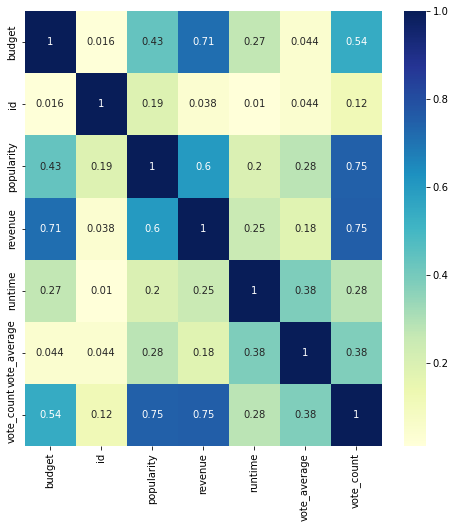

In [144]:
fig = plt.figure(figsize = (8, 8))

sns.heatmap(df_2_movies_t.corr().abs(), annot = True, cmap = 'YlGnBu')

In [145]:
df_2_movies_t.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [146]:
# Previsous correlation showed and improvement between 'vote_count' and target features. 

# Multiple linear regression with 'runtime' and 'vote_count' based on previous modifications

In [147]:
train_set, test_set = train_test_split(df_2_movies_t, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average'], axis = 1)
y_train = train_set['vote_average']

X_test = test_set.drop(['vote_average'], axis = 1)
y_test = test_set['vote_average']

In [148]:
X_train_mlr_2v = X_train[['runtime', 'vote_count']]
X_test_mlr_2v = X_test[['runtime', 'vote_count']]

In [149]:
lr = LinearRegression().fit(X_train_mlr_2v, y_train)

In [150]:
lr.coef_

array([0.01319372, 0.00018551])

In [151]:
lr.intercept_

4.6861155871103914

In [152]:
y_preds = lr.predict(X_test_mlr_2v)

In [153]:
r2_mlr_2v = r2_score(y_test, y_preds) # R2

In [154]:
adjusted_r2(r2_mlr_2v, X_train_mlr_2v) # Adjusted R2

0.23965640206936323

In [155]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

0.7553046670615274

In [156]:
mean_absolute_error(y_test, y_preds) # MAE

0.6092022149359291

In [157]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())


Residual sum of squares: 1120.72


In [158]:
# The metrics showed this not be a good model

# Multiple non-linear regression with 2º polynomial using 'runtime' and 'vote_count' based on previous modifications

In [159]:
X_train_mlr_2v_transformed = poly.fit_transform(X_train_mlr_2v)
X_test_mlr_2v_transformed = poly.fit_transform(X_test_mlr_2v)

In [160]:
X_train_mlr_2v_transformed = pd.DataFrame(X_train_mlr_2v_transformed, columns = poly.get_feature_names(X_train_mlr_2v.columns))
X_test_mlr_2v_transformed = pd.DataFrame(X_test_mlr_2v_transformed, columns = poly.get_feature_names(X_test_mlr_2v.columns))

In [161]:
non_lr = LinearRegression().fit(X_train_mlr_2v_transformed, y_train)

In [162]:
non_lr.coef_

array([ 0.00000000e+00,  8.33848001e-03,  7.07478845e-04,  3.77113434e-05,
       -3.75977683e-06, -1.04360899e-08])

In [163]:
y_preds = non_lr.predict(X_test_mlr_2v_transformed)

In [164]:
r2_score(y_test, y_preds) # R2

0.26582911653831653

In [165]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

0.7424851938746998

In [166]:
mean_absolute_error(y_test, y_preds) # MAE

0.6000702800192582

In [167]:
residuals = y_preds - y_test # residuos

In [168]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())


Residual sum of squares: 348.41


In [169]:
# So far this seems to be the best approach although the metrics are not good enough to recomend the model

# A new approach:

* Perform OHE on 'genre', 'production_companies' (only the first/main) and 'production_countries'
* remove movies with 0 'runtime'
* remove outliers from 'runtime' and 'vote_count'
* calculate he profit ('reveneu' - 'budget')
* remove the features: reveneu, budget, popularity, and all other categorical features
* remove NaNs


In [170]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [171]:
import ast

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [172]:
df['genres']= df['genres'].apply(convert)

In [173]:
df['production_companies']= df['production_companies'].apply(convert)

In [174]:
df['production_countries']= df['production_countries'].apply(convert)

In [175]:
df['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [176]:
movie_genre = df['genres'].apply(pd.Series)

In [177]:
movie_production_companies = df['production_companies'].apply(pd.Series)

In [178]:
movie_production_countries = df['production_countries'].apply(pd.Series)

In [179]:
df['main_genre'] = movie_genre[0]

In [180]:
df['main_production_company'] = movie_production_companies[0]

In [181]:
df['movie_production_country'] = movie_production_countries[0]

In [182]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,main_genre,main_production_company,movie_production_country
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,Ingenious Film Partners,United States of America
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,Walt Disney Pictures,United States of America


In [183]:
df['profit'] = df['revenue']-df['budget']

In [184]:
# We can now discard some features

In [185]:
df_movies = df.filter(['budget',
                       'original_language',
                       'popularity',
                       'revenue',
                       'runtime',
                       'vote_average',
                       'vote_count',
                       'status',
                       'main_genre',
                       'main_production_company',
                       'movie_production_country',
                       'profit'])

In [186]:
df_movies.isnull().sum() /len(df_movies)*100

budget                      0.000000
original_language           0.000000
popularity                  0.000000
revenue                     0.000000
runtime                     0.041641
vote_average                0.000000
vote_count                  0.000000
status                      0.000000
main_genre                  0.582969
main_production_company     7.307933
movie_production_country    3.622736
profit                      0.000000
dtype: float64

In [187]:
df_movies2 = df_movies.drop(['budget', 'revenue', 'status', 'movie_production_country'], axis=1)

In [188]:
df_movies2.head(2)

,original_language,popularity,runtime,vote_average,vote_count,main_genre,main_production_company,profit
0,en,150.437577,162.0,7.2,11800,Action,Ingenious Film Partners,2550965087
1,en,139.082615,169.0,6.9,4500,Adventure,Walt Disney Pictures,661000000


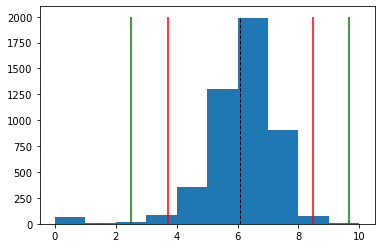

In [189]:
va_mean = df_movies2['vote_average'].mean()
va_std = df_movies2['vote_average'].std()

plt.hist(df_movies2['vote_average'], bins=10)
plt.vlines(va_mean, 0, 2000, color="k", linestyle="--", lw=1, label="mean")
plt.vlines([va_mean - 2 * va_std, va_mean + 2 * va_std], 0, 2000,
           color="r", label="$\mu$ ±2 $\sigma$")
plt.vlines([va_mean - 3 * va_std, va_mean + 3 * va_std], 0, 2000,
           color="g", label="$\mu$ ±3 $\sigma$")

plt.show()

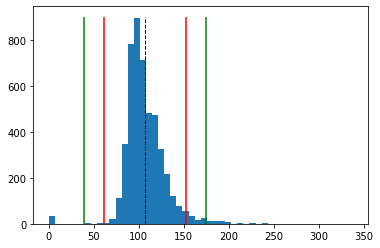

In [190]:
runtime_mean = df_movies2['runtime'].mean()
runtime_std = df_movies2['runtime'].std()

plt.hist(df_movies2['runtime'], bins=50)
plt.vlines(runtime_mean, 0, 900, color="k", linestyle="--", lw=1, label="mean")
plt.vlines([runtime_mean - 2 * runtime_std, runtime_mean + 2 * runtime_std], 0, 900,
           color="r", label="$\mu$ ±2 $\sigma$")
plt.vlines([runtime_mean - 3 * runtime_std, runtime_mean + 3 * runtime_std], 0, 900,
           color="g", label="$\mu$ ±3 $\sigma$")

plt.show()

In [191]:
print('### vote_average ###')
potential_outliers(df_movies2['vote_average'], 2)
print()
potential_outliers(df_movies2['vote_average'], 3)
print()
print('### runtime ###')
potential_outliers(df_movies2['runtime'], 2)
print()
potential_outliers(df_movies2['runtime'], 3)
print()

### vote_average ###
Outliers beyond 2std of mean: 158
lower_bound=3.7; upper_bound=8.5

Outliers beyond 3std of mean: 81
lower_bound=2.5; upper_bound=9.7

### runtime ###
Outliers beyond 2std of mean: 203
lower_bound=61.7; upper_bound=152.1

Outliers beyond 3std of mean: 97
lower_bound=39.0; upper_bound=174.7



In [192]:
mask_ru = (
    (df_movies2['runtime'] < runtime_mean - 3 * runtime_std)
    | (df_movies2['runtime'] > runtime_mean + 3 * runtime_std)
)

mask_va = (
    (df_movies2['vote_average'] < va_mean - 3 * va_std)
    | (df_movies2['vote_average'] > va_mean + 3 * va_std)
)

In [193]:
df_movies2_t = df_movies2[~mask_ru & ~mask_va].copy()

In [194]:
df_movies2_t.shape

(4642, 8)

In [195]:
df_movies2_t

,original_language,popularity,runtime,vote_average,vote_count,main_genre,main_production_company,profit
0,en,150.437577,162.0,7.2,11800,Action,Ingenious Film Partners,2550965087
1,en,139.082615,169.0,6.9,4500,Adventure,Walt Disney Pictures,661000000
2,en,107.376788,148.0,6.3,4466,Action,Columbia Pictures,635674609
3,en,112.312950,165.0,7.6,9106,Action,Legendary Pictures,834939099
4,en,43.926995,132.0,6.1,2124,Action,Walt Disney Pictures,24139100
...,...,...,...,...,...,...,...,...
4798,es,14.269792,81.0,6.6,238,Action,Columbia Pictures,1820920
4799,en,0.642552,85.0,5.9,5,Comedy,NaN,-9000
4800,en,1.444476,120.0,7.0,6,Comedy,Front Street Pictures,0
4801,en,0.857008,98.0,5.7,7,NaN,NaN,0


In [196]:
df_movies2_t.isnull().sum()

original_language            0
popularity                   0
runtime                      1
vote_average                 0
vote_count                   0
main_genre                   8
main_production_company    284
profit                       0
dtype: int64

In [197]:
df_movies2_t.dropna(inplace=True)

In [198]:
df_movies2_t.shape

(4355, 8)

In [199]:
df_movies2_t_ohe = pd.get_dummies(df_movies2_t[['main_genre']])

In [200]:
df_t = pd.concat([df_movies2_t, df_movies2_t_ohe], axis=1)

In [201]:
df_t.head(2)

,original_language,popularity,runtime,vote_average,vote_count,main_genre,main_production_company,profit,main_genre_Action,main_genre_Adventure,...,main_genre_History,main_genre_Horror,main_genre_Music,main_genre_Mystery,main_genre_Romance,main_genre_Science Fiction,main_genre_TV Movie,main_genre_Thriller,main_genre_War,main_genre_Western
0,en,150.437577,162.0,7.2,11800,Action,Ingenious Film Partners,2550965087,1,0,...,0,0,0,0,0,0,0,0,0,0
1,en,139.082615,169.0,6.9,4500,Adventure,Walt Disney Pictures,661000000,0,1,...,0,0,0,0,0,0,0,0,0,0


In [202]:
df_t.drop(['main_genre', 'original_language', 'main_production_company', 'popularity'], inplace=True, axis=1)

In [203]:
df_t.shape

(4355, 24)

In [204]:
df_t.head(2)

,runtime,vote_average,vote_count,profit,main_genre_Action,main_genre_Adventure,main_genre_Animation,main_genre_Comedy,main_genre_Crime,main_genre_Documentary,...,main_genre_History,main_genre_Horror,main_genre_Music,main_genre_Mystery,main_genre_Romance,main_genre_Science Fiction,main_genre_TV Movie,main_genre_Thriller,main_genre_War,main_genre_Western
0,162.0,7.2,11800,2550965087,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,169.0,6.9,4500,661000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

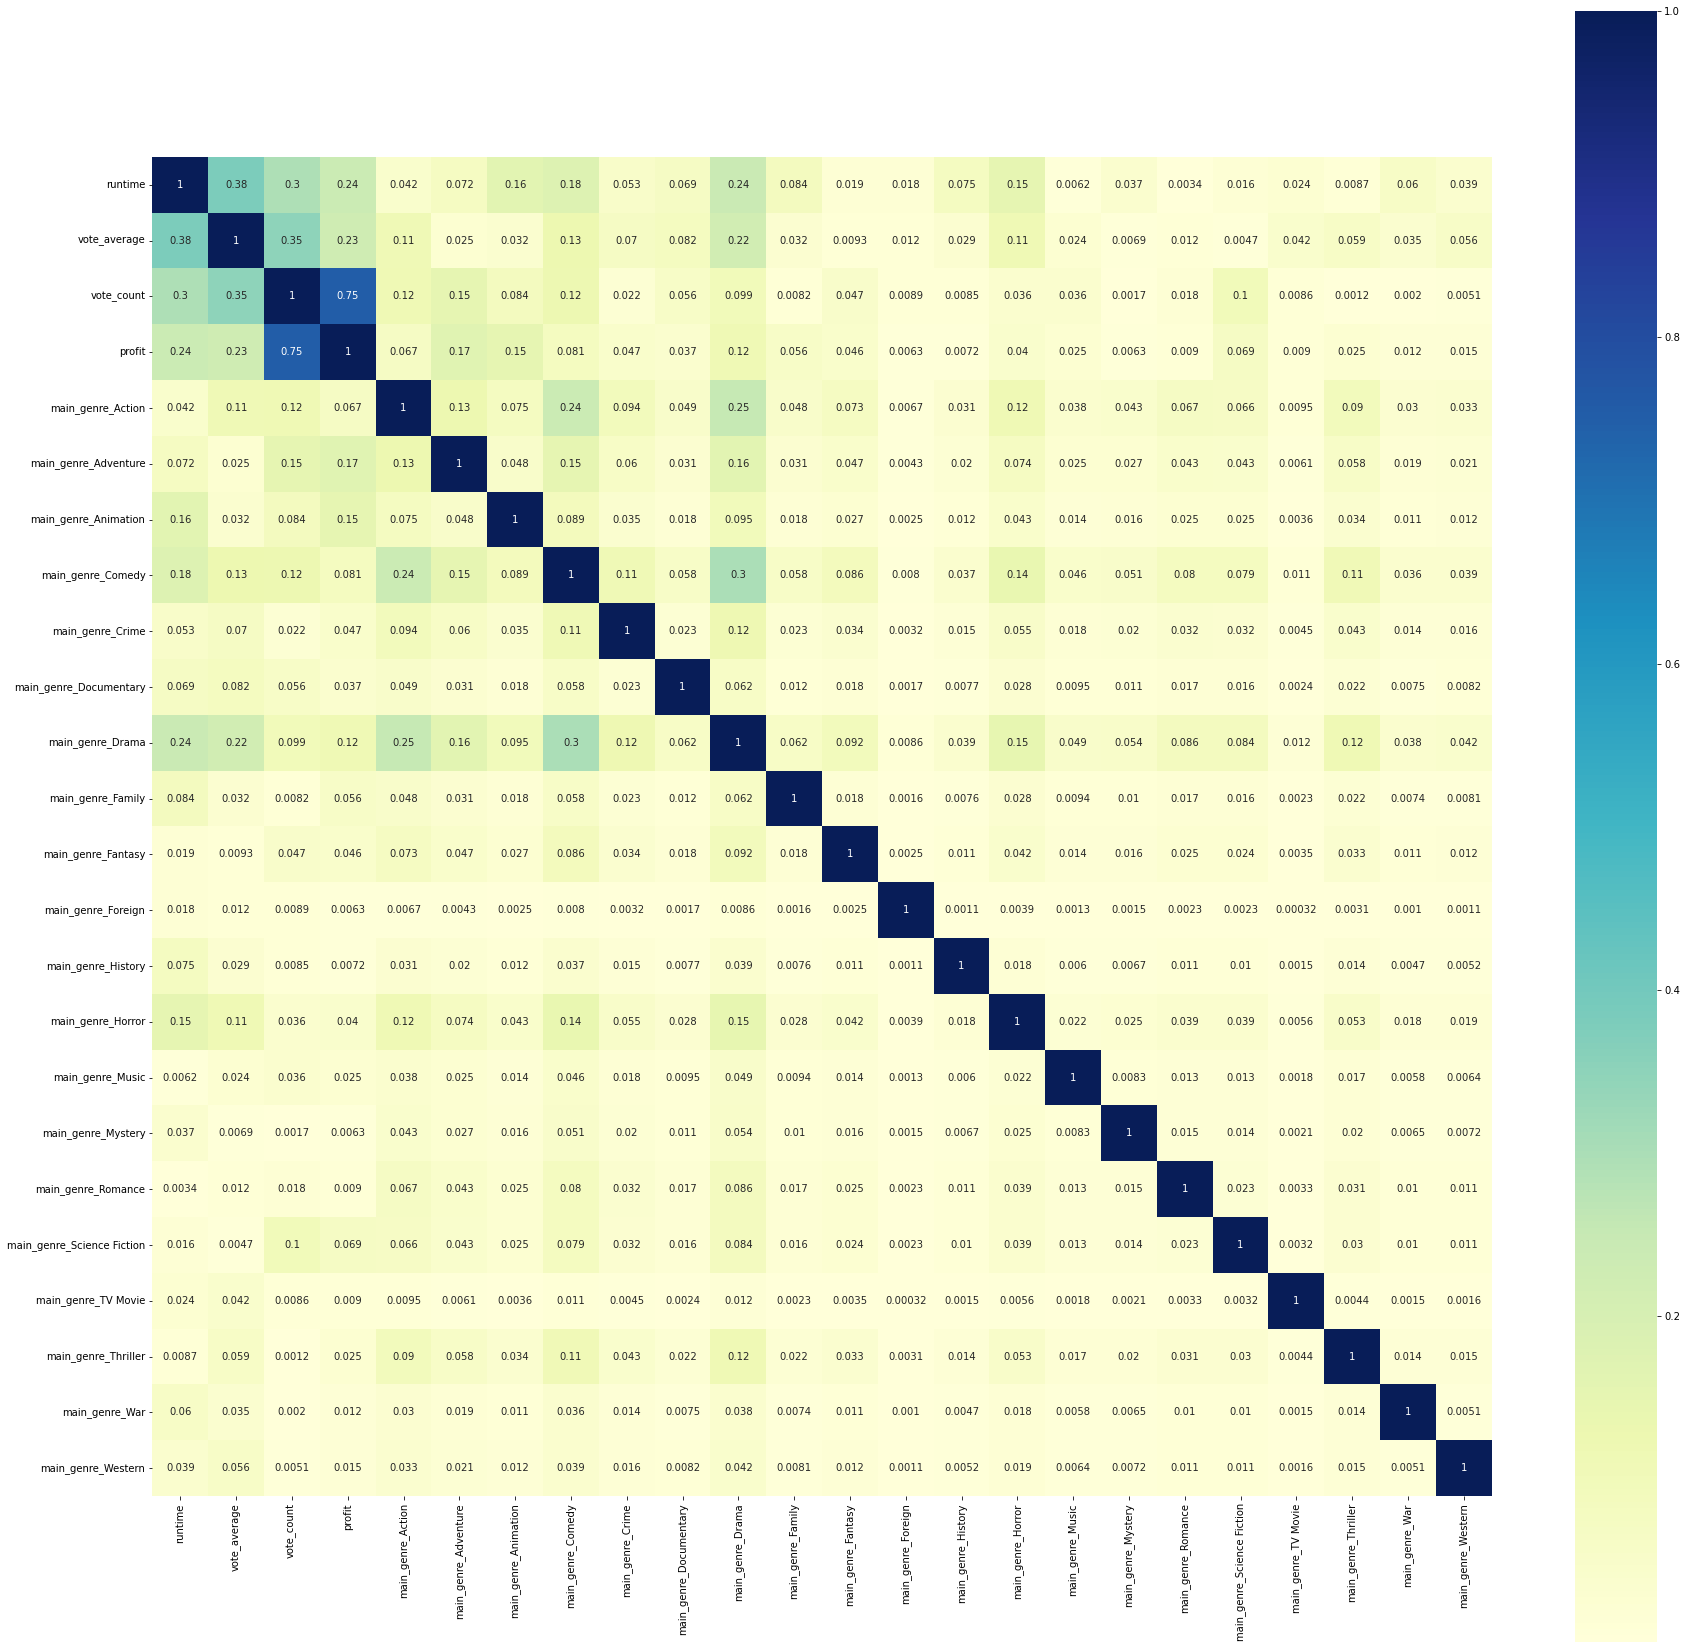

In [205]:
fig = plt.figure(figsize = (30, 30))

sns.heatmap(df_t.corr().abs(),square=True, annot = True, cmap = 'YlGnBu')

# Multiple linear regression wiht the previsous modifications

In [206]:
train_set, test_set = train_test_split(df_t, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['vote_average'], axis = 1)
y_train = train_set['vote_average']

X_test = test_set.drop(['vote_average'], axis = 1)
y_test = test_set['vote_average']

In [207]:
lr = LinearRegression().fit(X_train, y_train)

In [208]:
lr.coef_

array([ 1.31310836e-02,  2.74675997e-04, -6.17235617e-10, -3.61673156e-01,
       -1.25214050e-01,  2.52272347e-01, -1.19289566e-01,  1.94926952e-01,
        9.44565652e-01,  2.43034837e-01, -1.74450693e-01, -1.44963479e-01,
        1.10044962e+00,  1.37435444e-01, -2.42974820e-01,  2.94768677e-01,
        7.09933498e-02,  9.72988369e-02, -3.22384536e-01, -2.12919515e+00,
       -3.32175727e-01,  9.28322389e-02,  5.23743224e-01])

In [209]:
lr.intercept_

4.668558957462766

In [210]:
y_preds = lr.predict(X_test)

In [211]:
r2 = r2_score(y_test, y_preds) # R2

In [212]:
adjusted_r2(r2, X_train) # Adjusted R2

0.29784174199483193

In [213]:
mean_squared_error(y_test, y_preds, squared=False) # RMSE

0.7419635341010159

In [214]:
mean_absolute_error(y_test, y_preds) # MAE

0.5713963989289712

In [215]:
residuals = y_preds - y_test # residuals 

In [216]:
print("Residual sum of squares: %.2f" # RSS
  % ((residuals) ** 2).sum())

Residual sum of squares: 479.49


In [217]:
# Although the metrics seem to be the best so far, they still don't seem good enough

# The correlation doesn't indicate better correlation between features and target. We will not persue aditional models

**QUESTIONS**

    1.How many movies are in the dataset? And how many features?
    There are 4803 movies, however 2 have the same title. There are a total of 20 features.
    
    2. Are there variables that are not independent of each other?
    The variables, budget, popularity, reveneu and vote_count are not independent of each other. In most analysis and to avoid collinearity we use, only, vote_count.
    
    3. Which regression technique led to the best results?
    The technique that led to the best results was multiple linear regression with several transformations:
    * convert the 'genre', 'production_companies' and 'production_countries' columns
        * we only use the genre with OHE
    * calculate profit
    * discard 'reveneu' and 'budget'
    * remove nulls
    * remove outliers from 'runtime' and 'vote_count' (+-3 std of the mean)
    * apply OHE to the main_genre variable
        
    4. What factors contribute most to the success of a film?
    According to the correlation would be the variables 'runtime' and 'vote_count' in third would be 'popularity', but as it is collinear vote_count was not used
    
    5. Would you recommend your model to a film production company?
    No. Even in the best iteration of the model, the MAE (mean absolute error) is 0.571 and the RMSE 0.741 and R2 does not reach 0.3